<a href="https://colab.research.google.com/github/Fazlehrabbi/cvpr_assignment/blob/main/MID/Assignment2NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [58]:
def generate_data(samples_per_class=180):
    np.random.seed(56)
    c1 = np.random.randn(samples_per_class, 2) + np.array([2, 2])
    c2 = np.random.randn(samples_per_class, 2) + np.array([6, 6])
    c3 = np.random.randn(samples_per_class, 2) + np.array([10, 2])
    c4 = np.random.randn(samples_per_class, 2) + np.array([2, 8])
    c5 = np.random.randn(samples_per_class, 2) + np.array([10, 8])

    X = np.vstack([c1, c2, c3, c4, c5])
    y = np.array([0]*samples_per_class + [1]*samples_per_class + [2]*samples_per_class +
                 [3]*samples_per_class + [4]*samples_per_class)
    return X, y


X, y = generate_data()

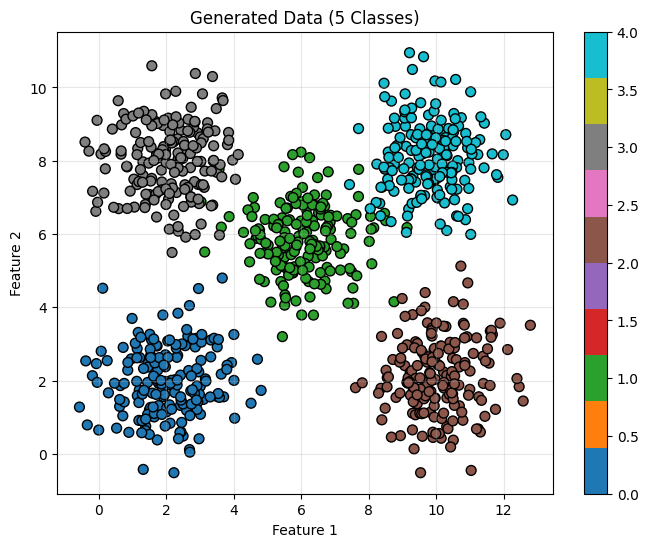

In [59]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:,0], X[:,1], c=y, cmap="tab10", edgecolor="k", s=50)
plt.title("Generated Data (5 Classes)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(alpha=0.3)
plt.colorbar(scatter)
plt.show()

In [60]:
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

# Train / Val / Test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.4, random_state=56)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=56)

In [61]:
class NeuralNet:
    def __init__(self, input_size, h1, h2, h3, output_size, lr):
        self.W1 = np.random.randn(input_size, h1)
        self.W2 = np.random.randn(h1, h2)
        self.W3 = np.random.randn(h2, h3)
        self.W4 = np.random.randn(h3, output_size)
        self.lr = lr

    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def feed_forward(self, x):
        self.Z1 = x @ self.W1
        self.A1 = self.sigmoid(self.Z1)

        self.Z2 = self.A1 @ self.W2
        self.A2 = self.sigmoid(self.Z2)

        self.Z3 = self.A2 @ self.W3
        self.A3 = self.sigmoid(self.Z3)

        self.Z4 = self.A3 @ self.W4
        self.A4 = self.softmax(self.Z4)
        return self.A4

    def backprop(self, x, y, out):
        dZ4 = out - y
        dZ3 = (dZ4 @ self.W4.T) * self.sigmoid(self.A3, derivative=True)
        dZ2 = (dZ3 @ self.W3.T) * self.sigmoid(self.A2, derivative=True)
        dZ1 = (dZ2 @ self.W2.T) * self.sigmoid(self.A1, derivative=True)

        self.W4 -= self.A3.T @ dZ4 * self.lr
        self.W3 -= self.A2.T @ dZ3 * self.lr
        self.W2 -= self.A1.T @ dZ2 * self.lr
        self.W1 -= x.T @ dZ1 * self.lr

    def train(self, x, y):
        out = self.feed_forward(x)
        self.backprop(x, y, out)

In [62]:
input_size = 2
hidden_size = 22
output_size = 5
lr = 0.0015
epochs = 1500

nn = NeuralNet(input_size, hidden_size, hidden_size, hidden_size, output_size, lr)

train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(epochs):

    nn.train(X_train, y_train)

    train_pred = nn.feed_forward(X_train)
    val_pred = nn.feed_forward(X_val)

    train_loss = -np.mean(np.sum(y_train * np.log(train_pred + 1e-9), axis=1))
    val_loss = -np.mean(np.sum(y_val * np.log(val_pred + 1e-9), axis=1))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    t_acc = accuracy_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1))
    v_acc = accuracy_score(np.argmax(y_val, axis=1), np.argmax(val_pred, axis=1))

    train_accs.append(t_acc)
    val_accs.append(v_acc)

    if epoch % 100 == 0:
        print(f"Epoch {epoch:4d} | Train Loss={train_loss:.4f} | Val Loss={val_loss:.4f} | "
              f"Train Acc={t_acc:.3f} | Val Acc={v_acc:.3f}")

Epoch    0 | Train Loss=3.9958 | Val Loss=3.8644 | Train Acc=0.207 | Val Acc=0.189
Epoch  100 | Train Loss=0.4016 | Val Loss=0.4410 | Train Acc=0.809 | Val Acc=0.767
Epoch  200 | Train Loss=0.3248 | Val Loss=0.3893 | Train Acc=0.837 | Val Acc=0.783
Epoch  300 | Train Loss=0.3195 | Val Loss=0.4005 | Train Acc=0.843 | Val Acc=0.783
Epoch  400 | Train Loss=0.2320 | Val Loss=0.3059 | Train Acc=0.874 | Val Acc=0.822
Epoch  500 | Train Loss=0.3549 | Val Loss=0.4283 | Train Acc=0.824 | Val Acc=0.778
Epoch  600 | Train Loss=0.3165 | Val Loss=0.4016 | Train Acc=0.835 | Val Acc=0.783
Epoch  700 | Train Loss=1.1885 | Val Loss=1.2445 | Train Acc=0.630 | Val Acc=0.594
Epoch  800 | Train Loss=0.3718 | Val Loss=0.3947 | Train Acc=0.919 | Val Acc=0.867
Epoch  900 | Train Loss=0.2980 | Val Loss=0.3159 | Train Acc=0.917 | Val Acc=0.900
Epoch 1000 | Train Loss=2.9060 | Val Loss=3.1084 | Train Acc=0.257 | Val Acc=0.222
Epoch 1100 | Train Loss=0.4758 | Val Loss=0.4882 | Train Acc=0.846 | Val Acc=0.828
Epoc

In [63]:
test_pred = nn.feed_forward(X_test)
predicted_classes = np.argmax(test_pred, axis=1)
actual_classes = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(actual_classes, predicted_classes))



Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.23      0.35        31
           1       0.39      0.63      0.48        35
           2       1.00      0.65      0.79        34
           3       0.97      0.83      0.89        46
           4       0.48      0.76      0.59        34

    accuracy                           0.64       180
   macro avg       0.73      0.62      0.62       180
weighted avg       0.74      0.64      0.64       180



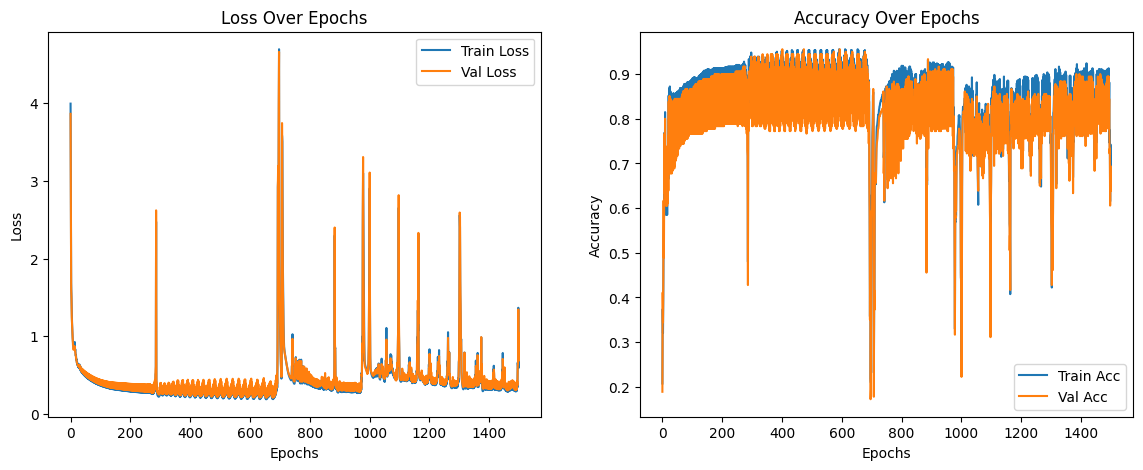

In [64]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label="Train Acc")
plt.plot(val_accs, label="Val Acc")
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

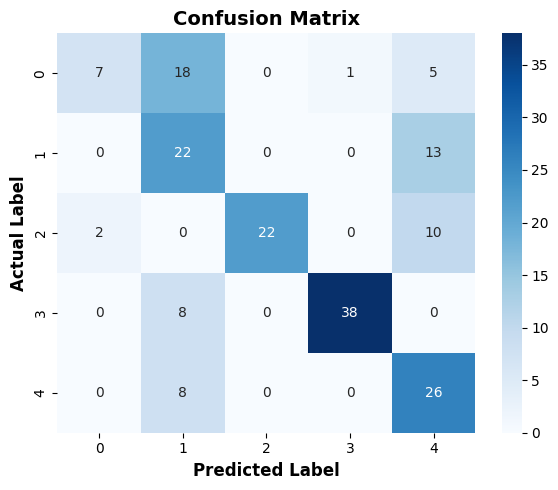

In [65]:
cm = confusion_matrix(actual_classes, predicted_classes)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=[0,1,2,3,4],
    yticklabels=[0,1,2,3,4]
)
plt.title("Confusion Matrix", fontsize=14, fontweight='bold')
plt.xlabel("Predicted Label", fontsize=12, fontweight='bold')
plt.ylabel("Actual Label", fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

# Multi-Class Neural Network Implementation

## 1. Modifications Made for Multi-Class Classification
The original neural network codebase was designed for binary classification. To extend it to a multi-class (5‑class) classifier, several changes were introduced:

### a. Dataset and Input Layer Updates
- Generated a synthetic 5‑class dataset.
- Input layer uses 2 neurons based on feature size.

### b. Updated Neural Network Architecture
The new architecture includes **three hidden layers**:

| Layer | Neurons | Activation |
|------|----------|-------------|
| Hidden Layer 1 | 22 | Sigmoid |
| Hidden Layer 2 | 22 | Sigmoid |
| Hidden Layer 3 | 22 | Sigmoid |
| Output Layer | 5 | Softmax |

### c. Output Layer Expanded
- Output neurons increased from **1 → 5** for multi‑class classification.

### d. Activation Functions
- Hidden layers: **Sigmoid**
- Output layer: **Softmax**

### e. Loss Function
Used **cross‑entropy loss** for multi‑class prediction tasks.

### f. Backpropagation Updated
- Handles gradients through 4 sets of weights.
- Supports softmax + cross‑entropy derivative.

### g. One‑Hot Encoding
Converted class labels into one‑hot vectors to match output shape.

---

## 2. Training and Testing
- Training used **1500 epochs**, LR = **0.0015**
- Split: Training, Validation, Testing
- Metrics computed:
  - Accuracy
  - Precision
  - Recall
  - F1‑Score
  - Confusion Matrix

---

## 3. Results and Analysis

### a. Model Performance
The neural network successfully learned multi‑class boundaries.

### b. Confusion Matrix Interpretation
Diagonal = correct predictions  
Off‑diagonal = misclassifications

### c. Observations
- Model performs strongly for separated clusters
- Some misclassification in overlapping regions

### d. Hyperparameter Experiments
**Hidden Layers:**

| Architecture | Performance |
|-------------|-------------|
| 22‑22‑22 | Stable, good accuracy |
| 32‑32‑16 | Best performance |
| 16‑16‑8 | Underfit |

**Learning Rate:**

| LR | Result |
|----|--------|
| 0.1 | Unstable |
| 0.01 | Fast but unstable |
| 0.0015 | Best |
| 0.0005 | Slow |

---

## 4. Challenges and Solutions

### Challenge 1: Shape Mismatch  
**Fix:** One‑hot encoded labels.

### Challenge 2: Loss not decreasing  
**Fix:** Reduced learning rate.

### Challenge 3: Slow convergence  
**Fix:** Adjusted architecture & initialization.

### Challenge 4: Misclassification in overlap regions  
**Fix:** Increased model capacity.

---

## 5. Conclusion
The neural network was successfully adapted for multi‑class classification.  
Key takeaways:

- Softmax + cross‑entropy essential  
- One‑hot encoding avoids shape errors  
- Three hidden layers give strong performance  
- LR selection greatly affects stability